### First exercise

In [1]:
Loch <- c('Ness', 'Lomond', 'Morar', 'Tay', 'Awe', 
          'Maree', 'Ericht', 'Lochy', 'Rannoch', 'Shiel',
          'Katrine', 'Arkaig', 'Shin')

Volume <- c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,
            1.07,0.97,0.79,0.77,0.75,0.35)

Area <- c(56,71,27,26.4,39,28.6,18.6,16,
          19,19.5,12.4,16,22.5)

Length <- c(39,36,18.8,23,41,20,23,16,
            15.7,28,12.9,19.3,27.8)

Max_depth <- c(230,190,310,150,94,114,
               156,162,134,128,151,109,49)

Mean_depth <- c(132,37,87,60.6,32,38,57.6,
                70,51,40,43.4,46.5,15.5)


scottish.lakes <- data.frame(Loch, Volume, Area,
                            Length, Max_depth, Mean_depth)

head(scottish.lakes, n=3)

#1.
max_area <- max(scottish.lakes$Area)
min_area <- min(scottish.lakes$Area)
max_volume <- max(scottish.lakes$Volume)
min_volume <- min(scottish.lakes$Volume) 
index_max_v <- which.max(scottish.lakes$Volume)
index_min_v <- which.min(scottish.lakes$Volume)
index_max_a <- which.max(scottish.lakes$Area)
index_min_a <- which.min(scottish.lakes$Area)


cat("the max area is", max_area, "for the lake", scottish.lakes$Loch[index_max_a], "\n")
cat("the min area is", min_area, "for the lake", scottish.lakes$Loch[index_min_a], "\n")
cat("the max volume is", max_volume, "for the lake", scottish.lakes$Loch[index_max_v], "\n")
cat("the min volume is", min_volume, "for the lake", scottish.lakes$Loch[index_min_v], '\n')

#2.
scottish.lakes = scottish.lakes[ order ( Area , decreasing = TRUE ),]
cat('the two largest area lakes are  ', scottish.lakes$Loch[1], ' and ', scottish.lakes$Loch[2])

#3.
total_area = sum(scottish.lakes$Area)
cat('the total area covered by water is ', total_area)

,Loch,Volume,Area,Length,Max_depth,Mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Ness,7.45,56,39.0,230,132
2,Lomond,2.60,71,36.0,190,37
3,Morar,2.30,27,18.8,310,87


the max area is 71 for the lake Lomond 
the min area is 12.4 for the lake Katrine 
the max volume is 7.45 for the lake Ness 
the min volume is 0.35 for the lake Shin 
the two largest area lakes are   Lomond  and  Nessthe total area covered by water is  372

### Second exercise

,Entity,Code,Year,OilPrice
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74


the highest price in history has been  111.6697 $ per barrel in 2012 


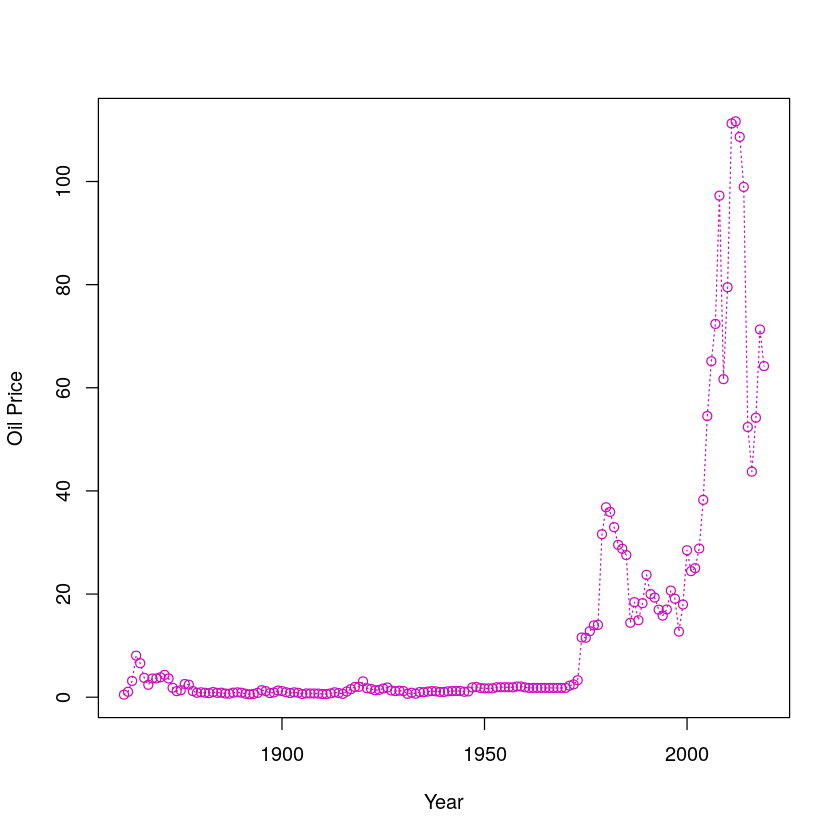

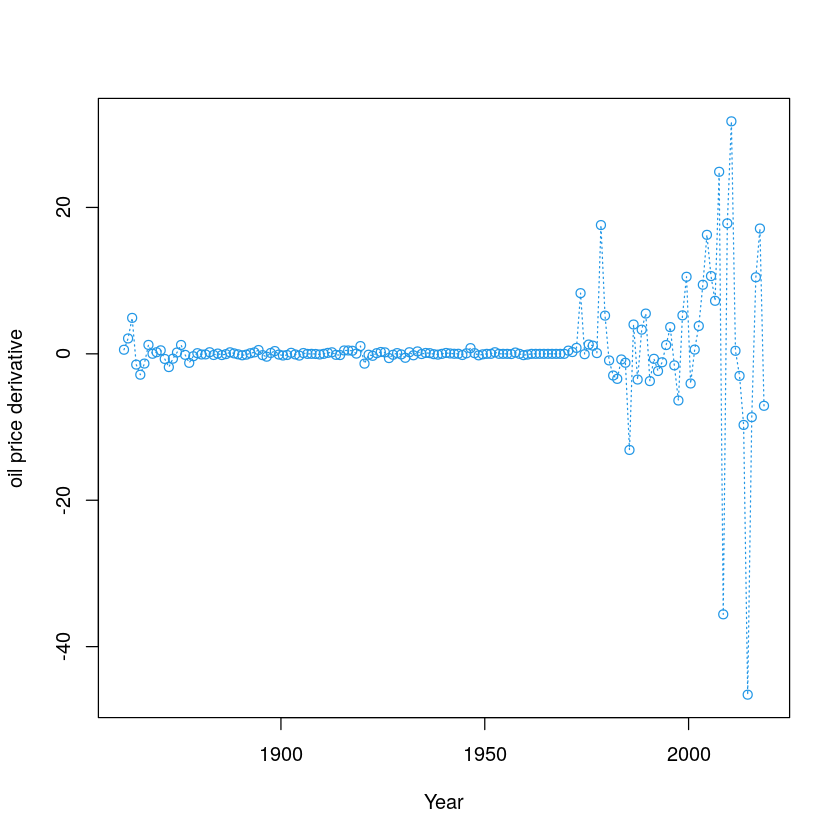

In [2]:
#1.
setwd("../DATA/")
oil <- read.csv(file='crude-oil-prices.csv', header=T, quote="", comment.char = '#')
head(oil)
#2.
plot(oil$Year, oil$OilPrice, xlab='Year', ylab='Oil Price', col=6)
lines(oil$Year, oil$OilPrice, lty=3, col=6)
#3.
index_max_price <- which.max(oil$OilPrice)
cat('the highest price in history has been ', oil$OilPrice[index_max_price],
   '$ per barrel in', oil$Year[index_max_price], '\n')
#4.
derivative <- tail(oil$OilPrice, -1)-head(oil$OilPrice, -1)
plot((tail(oil$Year, -1)+head(oil$Year, -1))/2, derivative, xlab='Year', ylab='oil price derivative', col=4)
lines((tail(oil$Year, -1)+head(oil$Year, -1))/2, derivative, xlab='Year', ylab='oil price derivative', col=4, lty=3)

### Third exercise



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




the  1 th coal producer is  World with a produciton of 1266402 TWh 
the  2 th coal producer is  OECD with a produciton of 1004274 TWh 
the  3 th coal producer is  Asia and Oceania with a produciton of 768012.9 TWh 
the  4 th coal producer is  Asia Pacific with a produciton of 696529.5 TWh 
the  5 th coal producer is  China with a produciton of 487179.5 TWh 


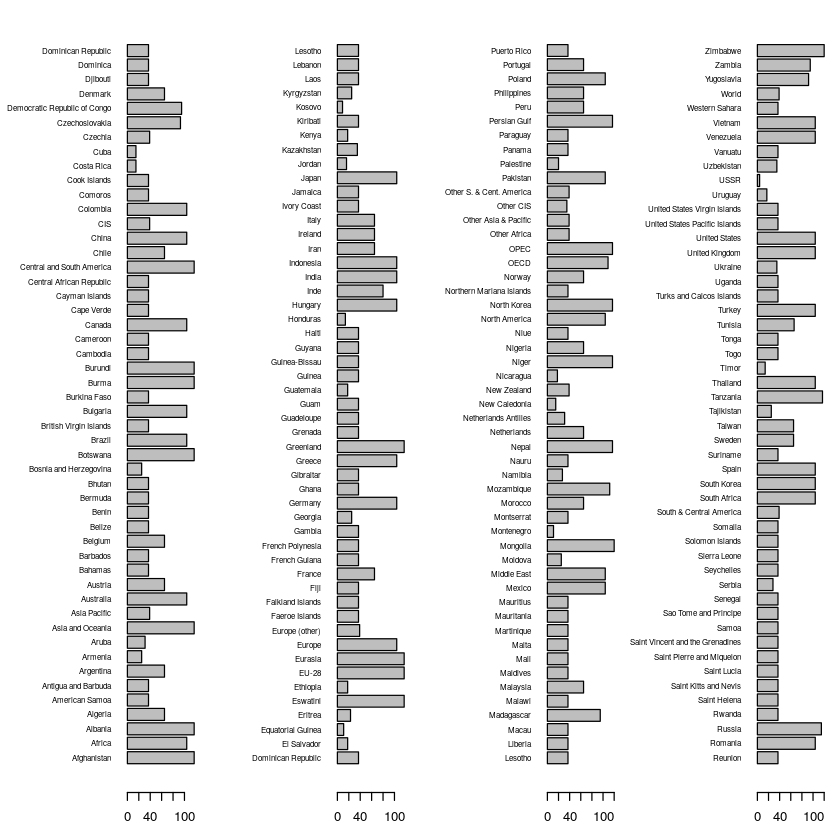

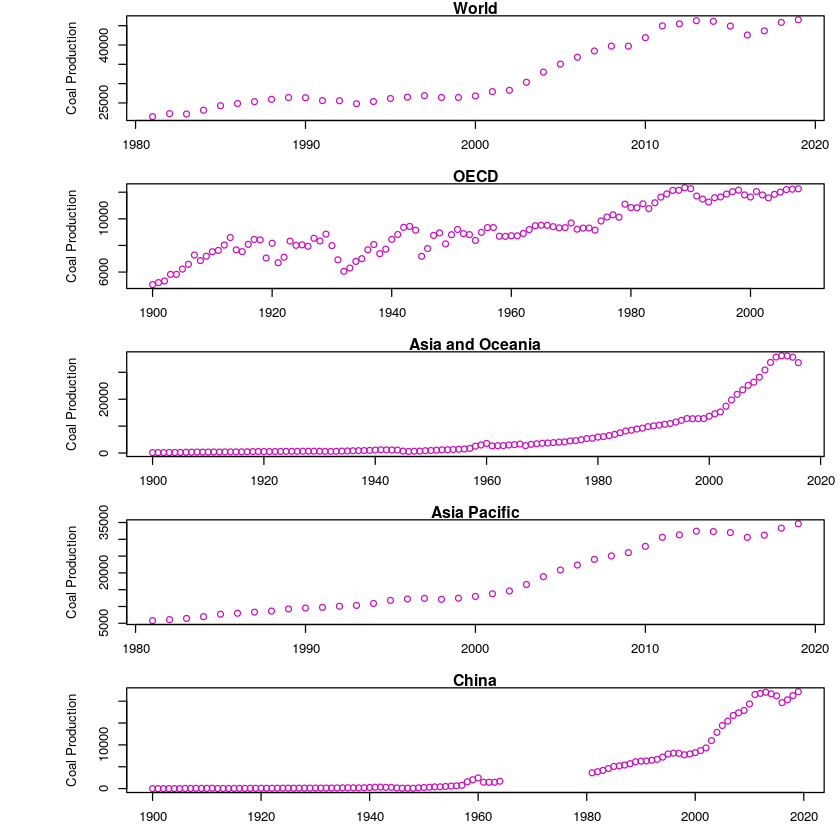

In [3]:
#1.
library('tidyverse')
coal <- read_csv('../DATA/coal-production-by-country.csv')
#2.
n_countries = n_distinct(coal$Entity)
counts = count(coal, Entity)

par(mfrow = c(1,4))
par(mar=c(3, 8,1, 1))
barplot(names=head(counts$Entity, 50), height = head(counts$n, 50), horiz=T, 
        cex.names = 0.6, las=1)
barplot(names=counts$Entity[50:100], height = counts$n[50:100], horiz=T, 
        cex.names = 0.6, las=1)
barplot(names=counts$Entity[100:150], height = counts$n[100:150], horiz=T, 
        cex.names = 0.6, las=1)
barplot(names=tail(counts$Entity, 50), height = tail(counts$n, 50), horiz=T, 
        cex.names = 0.6, las=1)

#3.
df = aggregate(coal$`Coal production (TWh)`,
          list(Entity = coal$Entity),
          subset = coal$Year > 1970,
          sum)

df = df[ order (df$x , decreasing = TRUE ),]

for (i in 1:5)
    cat ('the ', i,'th coal producer is ', df$Entity[i], 'with a produciton of', 
        df$x[i], 'TWh \n')
#4.

par(mfcol = c(5,1))
for (i in 1:5)  { 
   x = coal[coal$Entity==df$Entity[i], ]
   plot(x$Year, x$`Coal production (TWh)`, 
        main=unique(df$Entity[i]), xlab='Year',
        ylab='Coal Production', col=6)
    }



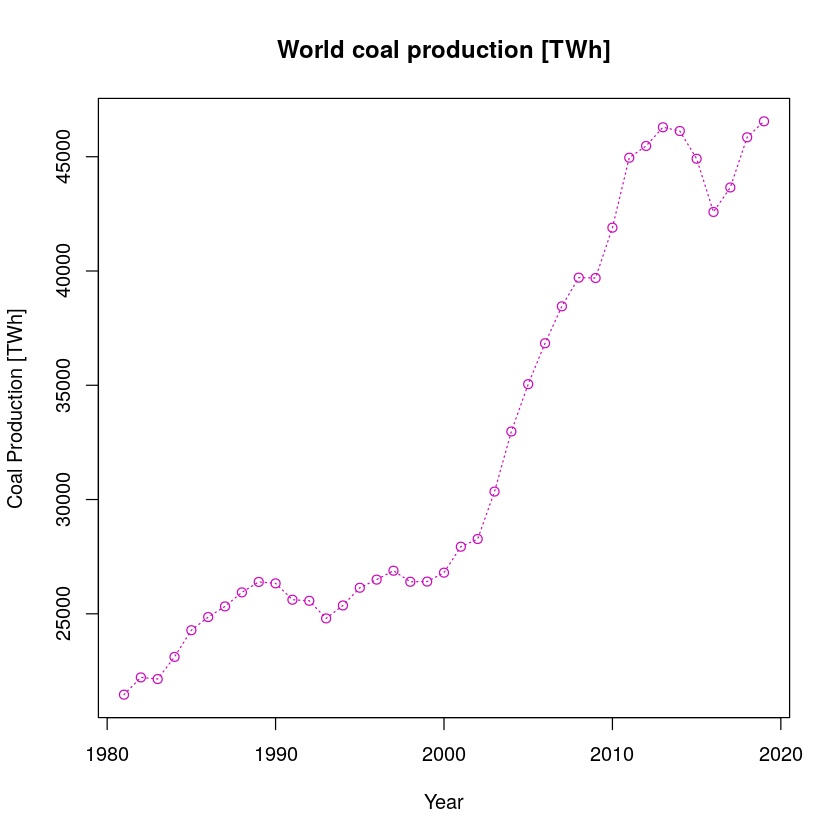

In [4]:
#5.
world = filter(coal, Entity=='World')
plot(world$Year, world$`Coal production (TWh)`, xlab='Year', ylab='Coal Production [TWh]', col=6, main='World coal production [TWh]')
lines(world$Year, world$`Coal production (TWh)`, col=6, lty=3)

### Fourth exercise 
##### part 1

In [5]:
#download.file('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv', destfile='../DATA/covid19.csv')
library("gridExtra")
covid <- read_csv('../DATA/covid19.csv')



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



── Column specification ────────────────────────────────────────────────────────
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




#### Italy data

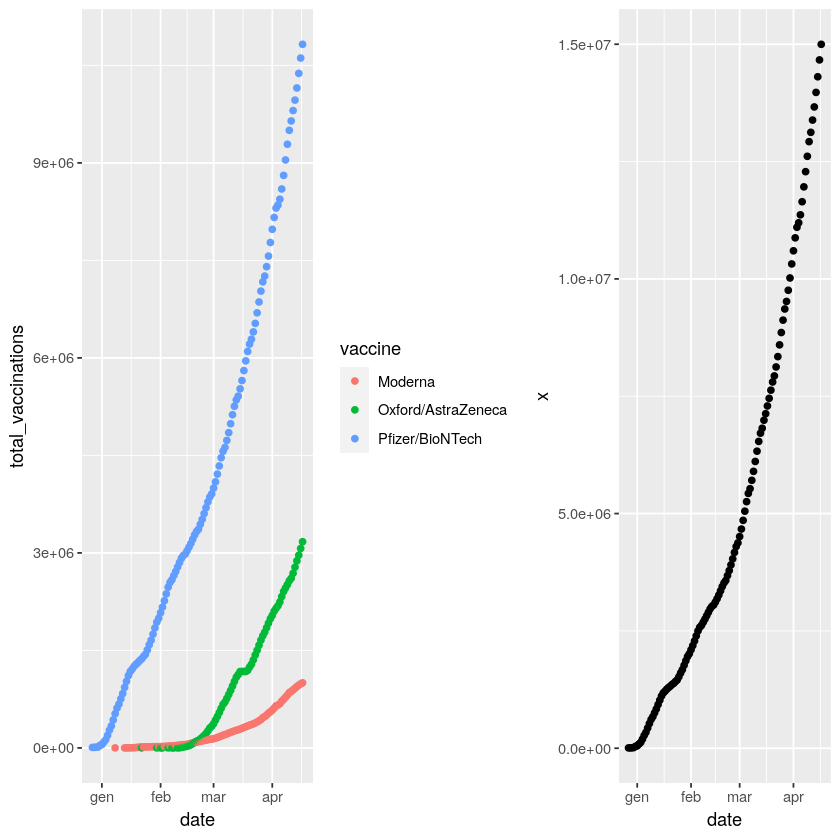

In [6]:
italy <- filter(covid, location=='Italy')
totv = aggregate(italy$total_vaccinations,
          list(date=italy$date),
          sum)
plot1 <- ggplot(data=italy, mapping = aes(x = date, y = total_vaccinations, color=vaccine)) + geom_point()
plot2 <- ggplot(data=totv, mapping=aes(x=date, y=x)) + geom_point()
grid.arrange(plot1, plot2, ncol=2,  widths = c(5, 3))

#### Germany data

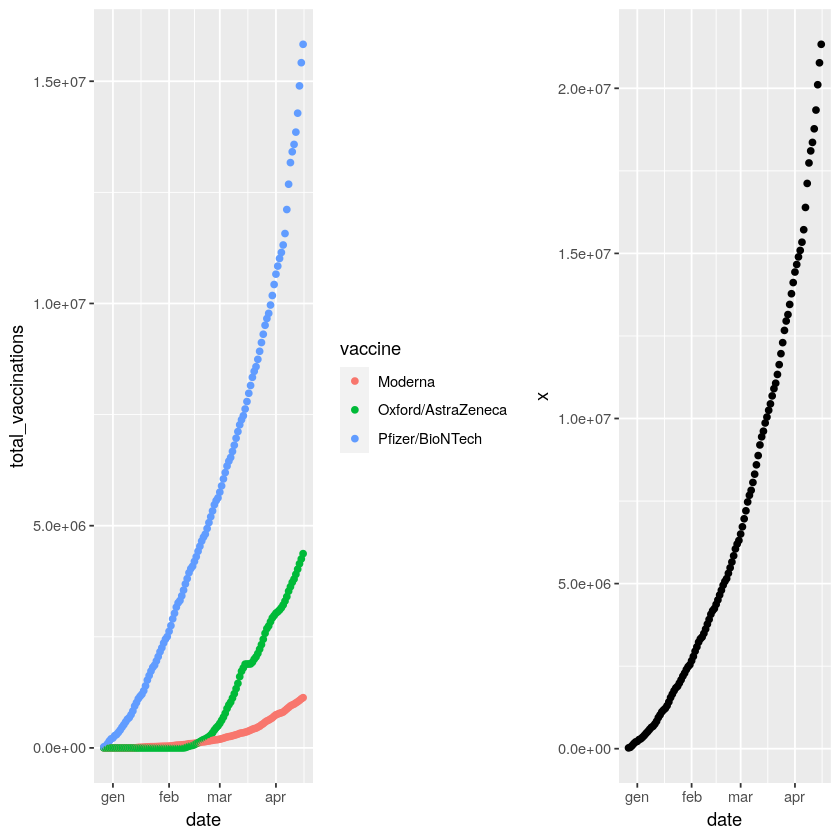

In [7]:
Germany <- filter(covid, location=='Germany')
totv = aggregate(Germany$total_vaccinations,
          list(date=Germany$date),
          sum)
plot1 <- ggplot(data=Germany, mapping = aes(x = date, y = total_vaccinations, color=vaccine)) + geom_point()
plot2 <- ggplot(data=totv, mapping=aes(x=date, y=x)) + geom_point()
grid.arrange(plot1, plot2, ncol=2,  widths = c(5, 3))

#### USA data

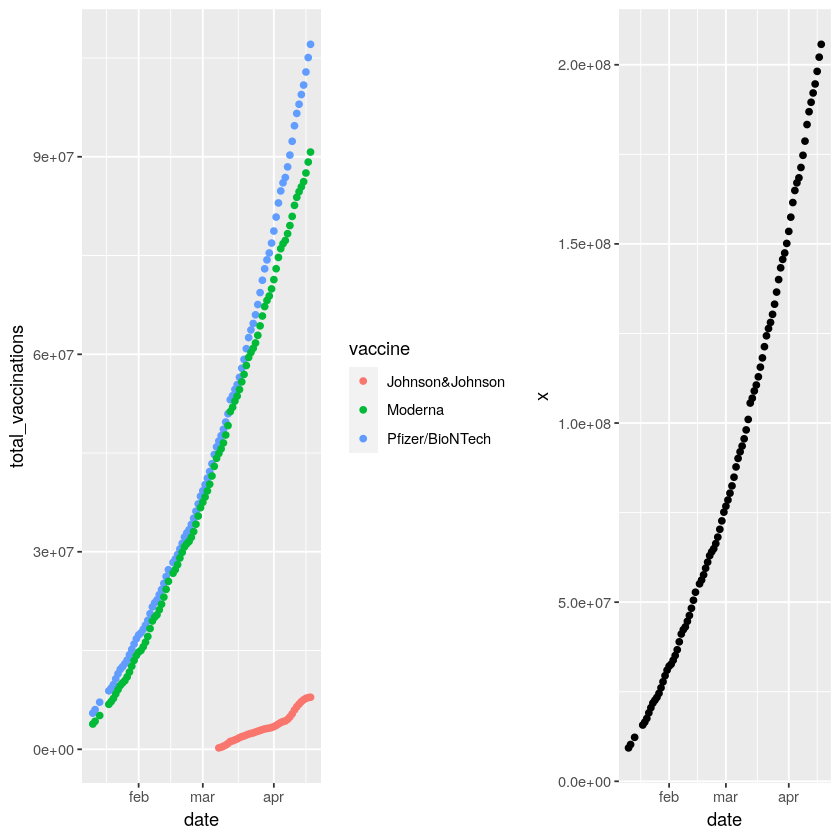

In [8]:

USA <- filter(covid, location=='United States')
totv = aggregate(USA$total_vaccinations,
          list(date=USA$date),
          sum)
plot1 <- ggplot(data=USA, mapping = aes(x = date, y = total_vaccinations, color=vaccine)) + geom_point()
plot2 <- ggplot(data=totv, mapping=aes(x=date, y=x), color=x) + geom_point()
grid.arrange(plot1, plot2, ncol=2,  widths = c(5, 3))

##### part 2

In [9]:
#download.file('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', destfile='../DATA/globalcovid19.csv')
covid <- read_csv('../DATA/globalcovid19.csv')
head(covid)


── Column specification ────────────────────────────────────────────────────────
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)


Warning message:
“1 parsing failure.
  row col   expected    actual                        file
10196  -- 12 columns 1 columns '../DATA/globalcovid19.csv'
”


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0,0,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,1367,NA,NA,NA,35


##### European data



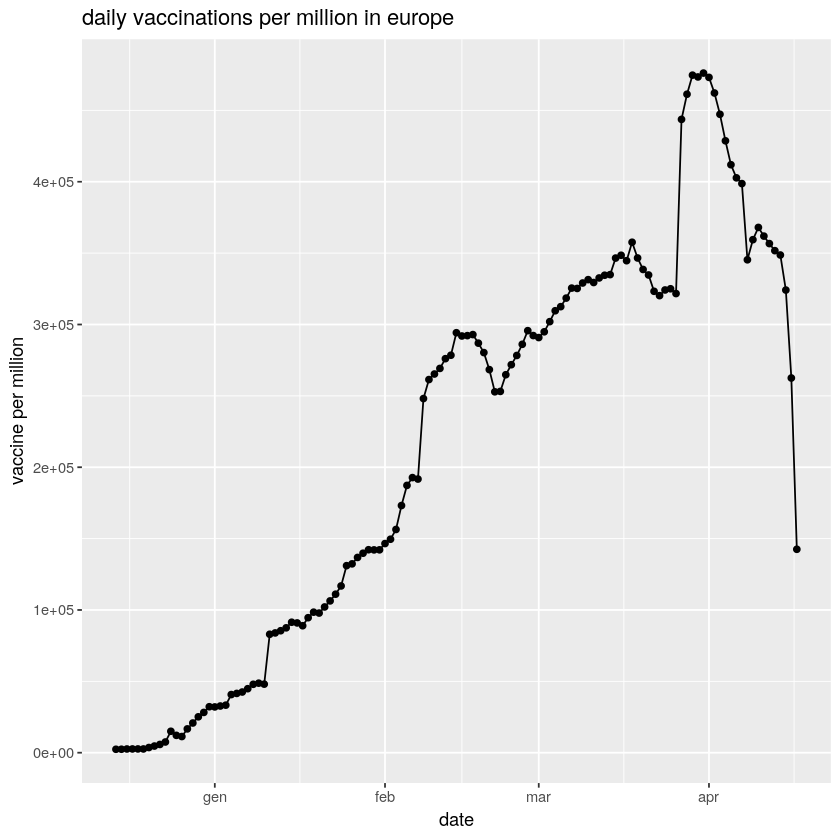

In [10]:
europe_c = c("Albania","Austria", "Belgium", "Bielorussia", "Bosnia", "Bulgaria", "Croatia", "Republic of Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
                 "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Macedonia","Malta","Moldavia", "Montenegro", "Netherlands","Norvegia", 
                 "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Ucraina")


europe = aggregate(covid$daily_vaccinations_per_million, list(date=covid$date),
                   subset= covid$location %in% europe_c,
                   sum,
                   na.rm=TRUE
)
plot1 <- ggplot(data=europe, mapping = aes(x = date, y = x)) + geom_point()+geom_line()+
labs(title="daily vaccinations per million in europe",
        x ="date", y = "vaccine per million")
plot1

##### comparison between states

Warning message:
“Removed 296 rows containing missing values (geom_point).”


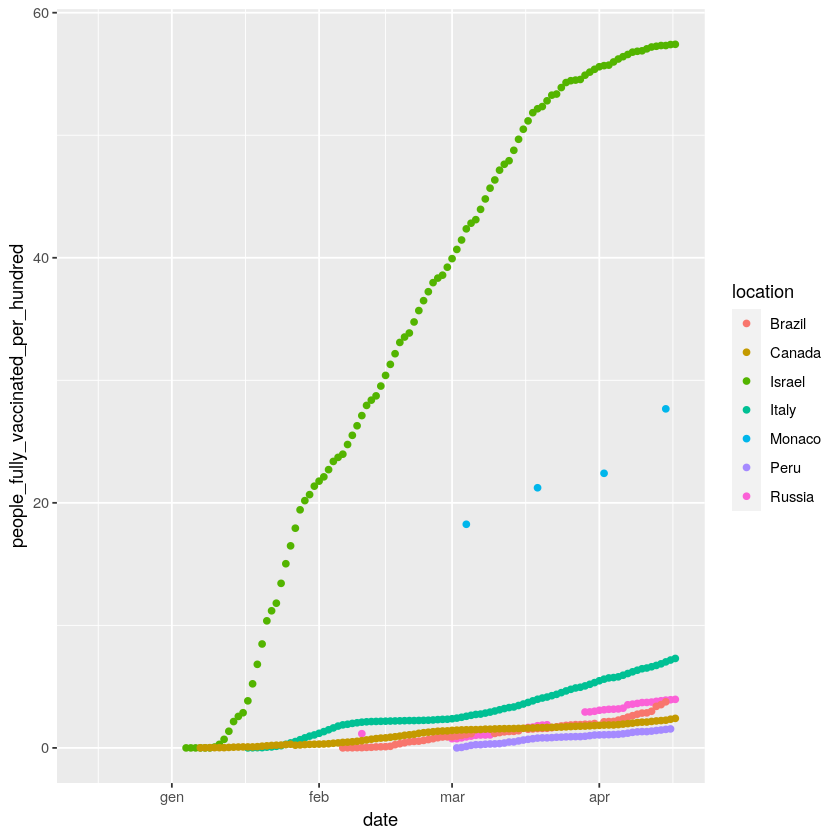

In [12]:

italy <- filter(covid, location=='Italy')
israel <- filter(covid, location=='Israel')
russia <- filter(covid, location=='Russia')
brasil <- filter(covid, location=='Brazil')
peru <- filter(covid, location=='Peru')
canada <- filter(covid, location=='Canada')
monaco <- filter(covid, location=='Monaco')

data <-rbind(italy, israel, russia, brasil, peru,canada, monaco)
plot1 <- ggplot(data=data, mapping = aes(x = date, y = people_fully_vaccinated_per_hundred, color=location)) + geom_point()
plot1